In [1]:
from tow_inspection_util import *
from tow_detection_util import *

# Find consecutive images

In [ ]:
# write out the file names to find out consecutive images
originFolder = '/home/mengl/Documents/nlr/original/20200422_Morning_range/'
selectFolder = '/home/mengl/Documents/nlr/selection/20200422_Morning_range/'
originList = os.listdir(originFolder)
selectList = os.listdir(selectFolder)
originList.sort()
selectList.sort()
originList = originList[int(len(originList)/2):]

for fileName in originList:
    if fileName.endswith(".png"):
        if fileName in selectList:
            print(fileName, '-------------------')
        else:
            print(fileName)

# Tow detection 

In [2]:
import csv

In [3]:
imgSourceFolders = '/home/mengl/Documents/nlr/consecutive/'
imgTargetFolders = '/home/mengl/Documents/nlr/towed/'
csvTargetFolders = '/home/mengl/Documents/nlr/towed_csv/'
folderList = os.listdir(imgSourceFolders)
folderList.sort()
print(folderList)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11_overflow', '12_jump', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']


### straight ones 

buffer_2020-04-22-122824.601248226.json_range.png
The course edges are at  1107 2250
The edges shape is (9, 2, 512)


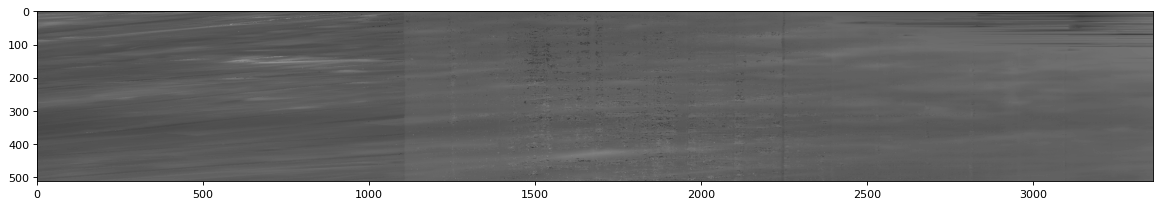

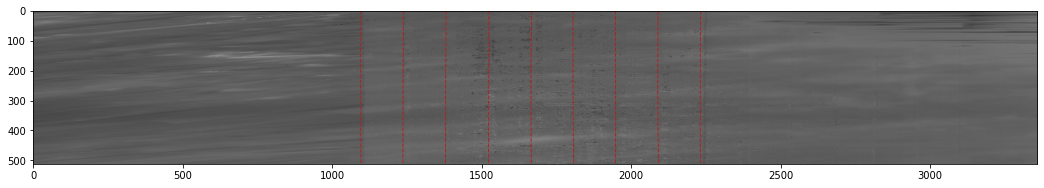

buffer_2020-04-22-122827.786457642.json_range.png
The course edges are at  1106 2249
The edges shape is (9, 2, 512)


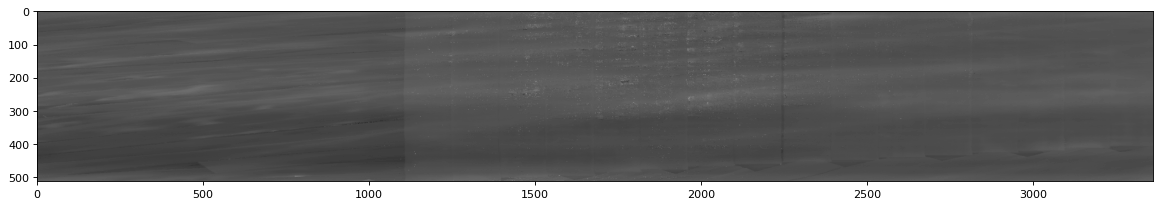

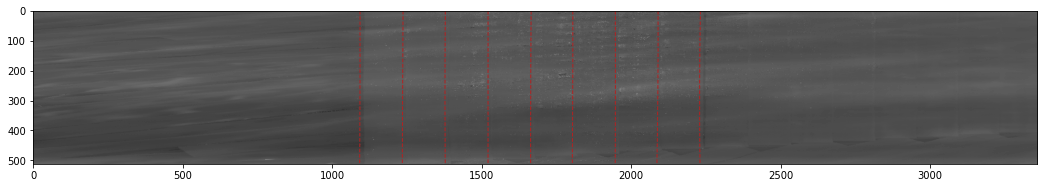

In [12]:
np.set_printoptions(threshold=sys.maxsize)
for folder in folderList[:20]:
    batchDir = imgSourceFolders + folder
    for file in os.listdir(batchDir):
        if file.endswith(".png") and not file.startswith("._"):
            print(file)
            filePath = os.path.join(batchDir, file)
            img = cv2.imread(filePath, 0)
            plotImage(img)
            
            edges = tow_detection(img)
#             print(edges)
#             write_tow_in_csv(file, np.transpose(edges[:, 0, :]), os.path.join(csvTargetFolders, folder))
            print("The edges shape is", edges.shape)
            
            # plot the edges on the image
            fig=plt.figure(figsize=(18, 16))
            plt.imshow(img, cmap='gray')
            
            for i in range(len(edges)):
                x = edges[i, 0, :]
                y = edges[i, 1, :]
                plt.plot(x, y, '--', linewidth=1, color='firebrick')
            plt.show()
        # break
    break

### squiggly ones 

buffer_2020-04-22-153224.429641963.json_range.png


/usr/local/lib/python3.8/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.8/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


The course edges are at  1324 1929


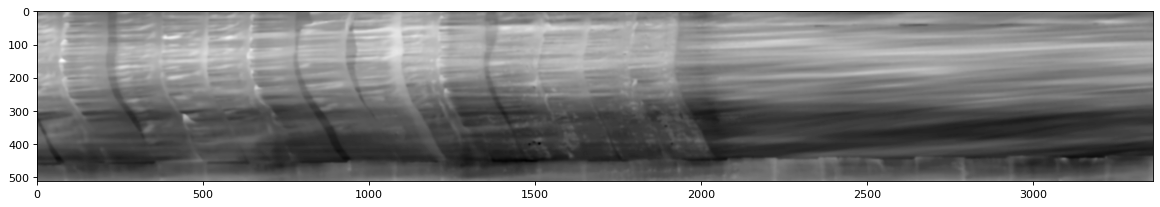

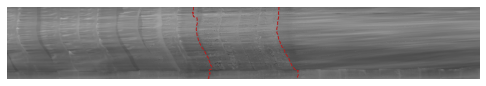

buffer_2020-04-22-153221.244415146.json_range.png


/usr/local/lib/python3.8/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.8/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


The course edges are at  1328 1901


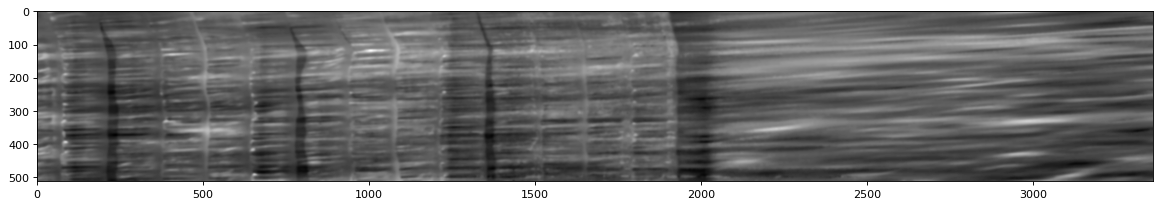

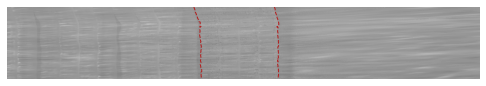

In [15]:
for folder in folderList[25:]:
    batchDir = imgSourceFolders + folder
    for file in os.listdir(batchDir):
        if file.endswith(".png") and not file.startswith("._"):
            print(file)
            filePath = os.path.join(batchDir, file)
            img = cv2.imread(filePath, 0)
            # plotImage(img)
            
            edges = tow_detection_steer(img)
            edge_for_scv = np.empty((2, edges.shape[2]))
            edge_for_scv[0] = edges[0, 1, :]
            edge_for_scv[1] = edges[-1, 1, :]
            
            write_tow_in_csv(file, np.transpose(edge_for_scv), os.path.join(csvTargetFolders, folder))
            # plot the edges on the image
            fig=plt.figure(figsize=(18, 16))
            fig.set_size_inches(float(img.shape[1])/float(img.shape[0]), 1, forward=False)
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            plt.imshow(img, cmap='gray')
            
            for i in range(len(edges)):
                if i == 0 or i == 4:
                    x = edges[i, 1, :]
                    y = edges[i, 0, :]
                    plt.plot(x, y, '--', linewidth=1, color='firebrick')
#             fig.savefig(imgTargetFolders + folder + "/" + file, dpi=img.shape[0])
            plt.show()
        #break
    break